# **Projet :Reconnaissance faciale**

####nom: **Belbaki et boutebal**
####prenom: **Samah et sihem**
####specialité: **1DSIA**
####années: **2022/2023**


---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob
from PIL import Image as im
from skimage.feature import hog
from skimage.transform import resize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score

# 1. Prétraitement:

# 1.1. Rajouter l’extension « .gif » aux 165 images de la base:

In [ ]:
def laod_images_opencv_extisions(data_path,saving_path): 
  for file_name in os.listdir(data_path): #cette commande fait des iteration en prenant un element du dossier dont le chemain est : data_path
    if  not 'txt' in file_name and not 'DS_Store' in file_name: # on elimine les fichiers .txt et DS_Store
      image = im.open(data_path + '/' + file_name) #On utlise le package im de la librerie PIL pour ovrir les images
      subject_num = file_name.split('.')[0] #On garde la partie avant l'extention 
      img_path = saving_path + '/' + subject_num + '/' + file_name + '.gif' #On ajoute l'exention gif
      if not os.path.isdir(saving_path + '/' + subject_num):
       os.mkdir(saving_path + '/' + subject_num)   #On cree les nouveau fichiers des images avec l'extention .gif
      if not os.path.isfile(img_path):
             image.save(img_path)
    else:
         print("Already Completed")





# Commentaires:


*   Dans cette etape, on a definie une fonction **laod_images_opencv_extisions** qui prend en deux arguments: le chemin du dossier qui contient les images, et le chemin du dossier qui contient les images en leurs ajoutant l'extension ".gif".




In [ ]:
laod_images_opencv_extisions('/content/drive/MyDrive/Projet_Tim/DataSet/yalefaces','/content/drive/MyDrive/Projet_Tim/DataSet/ajout_des_gif')

Already Completed


# Commentaires:
On applique la fonction **laod_images_opencv_extisions** sur notre dossier d'images.

# 1.2.récupérer uniquement la tête de la personne:

In [ ]:
face_cascade=cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml") 
data_path=r'/content/drive/MyDrive/Projet_Tim/DataSet/ajout_des_gif'
new_path = '/content/drive/MyDrive/Projet_Tim/DataSet/new_path' #le chemin qui va contenir les nouvelle images coupées.
for file_name in os.listdir(data_path): #On va parcourir tous les fichiers dans notre dossier.
    p = os.makedirs(new_path+'/'+file_name)  
    for image in os.listdir(data_path+'/'+file_name):#Pour chaque image dans un fichier 
        gray = plt.imread(data_path+'/'+file_name+'/'+image) #lire l'image
        face = face_cascade.detectMultiScale(gray, 1.1 , 5) #cette fonction detecte le visage dans une image
        x=face[0][0]
        y=face[0][1]
        w=face[0][2]
        h=face[0][3]
        cv.rectangle(gray, (x,y), (x+w, y+h), (0,0,0), 2) #On va definir notre rectangle qui delimite le visage de la personne dans l'image.
        crop=gray[y:y+h,x:x+w] #Couper l'image suivant le rectangle predifinie.
        print(crop.shape)
        cv.imwrite(new_path+'/'+file_name+'/'+image+".png",crop ) #enregister l'image obtenue dans le nouveau dossier

(150, 150, 4)
(163, 163, 4)
(162, 162, 4)
(161, 161, 4)
(144, 144, 4)
(157, 157, 4)
(155, 155, 4)
(134, 134, 4)
(166, 166, 4)
(163, 163, 4)
(158, 158, 4)
(160, 160, 4)
(156, 156, 4)
(158, 158, 4)
(155, 155, 4)
(156, 156, 4)
(156, 156, 4)
(157, 157, 4)
(154, 154, 4)
(155, 155, 4)
(164, 164, 4)
(151, 151, 4)
(140, 140, 4)
(157, 157, 4)
(141, 141, 4)
(135, 135, 4)
(146, 146, 4)
(146, 146, 4)
(135, 135, 4)
(141, 141, 4)
(143, 143, 4)
(137, 137, 4)
(153, 153, 4)
(149, 149, 4)
(157, 157, 4)
(151, 151, 4)
(147, 147, 4)
(155, 155, 4)
(159, 159, 4)
(139, 139, 4)
(153, 153, 4)
(156, 156, 4)
(151, 151, 4)
(159, 159, 4)
(162, 162, 4)
(159, 159, 4)
(149, 149, 4)
(164, 164, 4)
(161, 161, 4)
(148, 148, 4)
(161, 161, 4)
(159, 159, 4)
(158, 158, 4)
(163, 163, 4)
(149, 149, 4)
(162, 162, 4)
(155, 155, 4)
(154, 154, 4)
(151, 151, 4)
(156, 156, 4)
(156, 156, 4)
(164, 164, 4)
(156, 156, 4)
(154, 154, 4)
(154, 154, 4)
(158, 158, 4)
(144, 144, 4)
(150, 150, 4)
(145, 145, 4)
(140, 140, 4)
(143, 143, 4)
(143, 

# Commentaires:
Dans cette étape, on a cree un nouveau dossier qui va contenir les images coupées, On a utiliser la fonction **face_cascade.detectMultiScale()** pour detecter le visage d'une personne dans une image et puis on a garder que cette partie, et a la fin on a enregistrée les images resultantes dans un autre dossier.

# 2. Génération des caractéristiques:

In [ ]:
vect_classes=["classe 1","classe 2","classe 3","classe 4","classe 5","classe 6","classe 7","classe 8","classe 9","classe 10","classe 11","classe 12","classe 13","classe 14","classe 15"]
#On cree un vecteur qui contient nos 15 classes ou chaque classe represente une personne.
df=[]
vect_gradient=[]
gradient = []
i=0
for file_name in os.listdir(new_path): #Parcourir les fichier d'images dans notre dossier.
  for image in os.listdir(new_path+'/'+file_name): #Pour chaque image dans le fichier
    im =plt.imread(new_path+'/'+file_name+'/'+image) # lire l'image
    im= resize(im,(128,64)) 
    fv, hog_image = hog(im, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2), visualize
                        =True, multichannel=True) # Calcule du vecteur de gradients
    vect_gradient.append(fv)
    gradient.append(hog_image)
  df_vect_gradient=pd.DataFrame(vect_gradient) #Chaque fichier on a cree un tableau qui contient tous les vecteur gradients puis on l'a converti en DataFrame
  vect_gradient=[]
  df_vect_gradient["classes"]=vect_classes[i] # Creation d'une colonne "classes" dont la valeur est la classe adequate pour chaque fichier
  df.append(df_vect_gradient) # ajouter cette dataframe comme element dans le tableau df
  i=i+1

  
  






    
    


,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.412971,0.097425,0.002159,0.098452,0.412971,0.003109,0.003393,0.006682,0.021272,0.299269,...,0.324291,0.000000,0.000000,0.164640,0.364022,0.000000,0.000000,0.000000,0.000000,classe 2
1,0.395129,0.234501,0.000000,0.072191,0.395129,0.000000,0.053446,0.000000,0.120759,0.093464,...,0.291493,0.008646,0.071888,0.151213,0.362540,0.082964,0.063759,0.071770,0.058194,classe 2
2,0.425043,0.078118,0.000000,0.072843,0.425043,0.047305,0.002452,0.059545,0.123005,0.158779,...,0.303090,0.022228,0.015082,0.143790,0.356700,0.047787,0.014226,0.031208,0.008590,classe 2
3,0.392351,0.097608,0.000000,0.077380,0.392351,0.000000,0.062280,0.001547,0.214590,0.218754,...,0.381807,0.029397,0.000000,0.170464,0.386688,0.000000,0.008993,0.029655,0.036274,classe 2
4,0.415510,0.094992,0.002976,0.089065,0.415510,0.001816,0.000000,0.082324,0.068333,0.259185,...,0.236945,0.037085,0.013544,0.144025,0.331338,0.068931,0.031232,0.027013,0.014872,classe 2
5,0.415510,0.094992,0.002976,0.089065,0.415510,0.001816,0.000000,0.082324,0.068333,0.259185,...,0.236945,0.037085,0.013544,0.144025,0.331338,0.068931,0.031232,0.027013,0.014872,classe 2
6,0.428753,0.123286,0.000449,0.107302,0.428753,0.000342,0.000000,0.000000,0.016556,0.106365,...,0.107266,0.010174,0.002643,0.155712,0.374353,0.005526,0.004414,0.000000,0.265039,classe 2
7,0.403433,0.106676,0.001069,0.092320,0.403433,0.002863,0.000000,0.079631,0.006011,0.382056,...,0.226616,0.043589,0.030525,0.140571,0.341293,0.052084,0.022478,0.020567,0.045194,classe 2
8,0.402532,0.138818,0.002400,0.072082,0.402532,0.000000,0.001318,0.000000,0.119924,0.092872,...,0.210975,0.044702,0.032463,0.194540,0.364502,0.050233,0.121661,0.000000,0.142634,classe 2
9,0.421965,0.153340,0.000000,0.081801,0.421965,0.000000,0.053502,0.000000,0.256934,0.022034,...,0.259384,0.003361,0.007555,0.155375,0.381506,0.044756,0.033034,0.004643,0.080639,classe 2


In [ ]:
df[7]

,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.455023,0.106021,0.000000,0.102942,0.455023,0.0,0.000000,0.065425,0.007961,0.002342,...,0.224744,0.000000,0.000000,0.114708,0.345003,0.000000,0.000000,0.000000,0.000000,classe 8
1,0.415043,0.113654,0.004350,0.107449,0.415043,0.0,0.000000,0.000000,0.084414,0.037140,...,0.166059,0.000000,0.000000,0.087678,0.296472,0.088445,0.106629,0.296472,0.296472,classe 8
2,0.436051,0.155389,0.001869,0.077546,0.436051,0.0,0.000488,0.069154,0.081273,0.026098,...,0.223356,0.061970,0.024733,0.295262,0.330698,0.064179,0.011052,0.055630,0.071249,classe 8
3,0.448442,0.148495,0.004591,0.080256,0.448442,0.0,0.000000,0.067702,0.068507,0.019990,...,0.210995,0.036882,0.041215,0.105543,0.334964,0.028698,0.174180,0.211882,0.072470,classe 8
4,0.438471,0.160729,0.000000,0.080993,0.438471,0.0,0.067009,0.000000,0.078056,0.001118,...,0.179242,0.006794,0.038865,0.150484,0.320465,0.033440,0.054427,0.076588,0.135820,classe 8
5,0.415043,0.113654,0.004350,0.107449,0.415043,0.0,0.000000,0.000000,0.084414,0.037140,...,0.166059,0.000000,0.000000,0.087678,0.296472,0.088445,0.106629,0.296472,0.296472,classe 8
6,0.480578,0.139024,0.001844,0.125666,0.480578,0.0,0.000000,0.000000,0.023302,0.000736,...,0.306776,0.037507,0.006594,0.144777,0.306776,0.000000,0.165245,0.306776,0.180292,classe 8
7,0.374819,0.079727,0.000000,0.077713,0.374819,0.0,0.000000,0.000000,0.000000,0.373040,...,0.241885,0.021221,0.049057,0.118562,0.317110,0.025589,0.174030,0.153656,0.079967,classe 8
8,0.447242,0.153603,0.000000,0.078367,0.447242,0.0,0.000000,0.063181,0.063433,0.001869,...,0.238034,0.038635,0.026875,0.157693,0.325047,0.054149,0.051403,0.037044,0.045980,classe 8
9,0.433291,0.306027,0.000000,0.084442,0.433291,0.0,0.060051,0.000000,0.206268,0.030825,...,0.186014,0.013763,0.032731,0.154388,0.304477,0.044695,0.058784,0.126524,0.111406,classe 8


# Commentaires:
Dans cette partie on a :
* cree dabord un vecteur avec les noms des classes.
* Pour chaque image dans un fichier (Classe) On a calculer le vecteur de gradients a l'aide de la fonction **hog()** 
* On ajouter les resultats de toutes les images dans un tableau (le resultat est un tableau dont les elements sont les vecteurs caracteristiques).
* On convertit le tableau on dataframe dont on ajoute la colonne "Classes" et on met sa valeur au nom de la classes pour tous les vecteurs (car ils appartient au meme classe).
* On ajoute cette data frame a un tableau.
* On repete ces etapes pour chaque fichier (Classe).
* A la fin, on aura un tableau dont les elements sont les dataframes pour chauqe classe (chaque data frame contient les vecteurs caracteristiques de tous les images de cette classe )

In [ ]:
dataset = pd.concat(df, ignore_index=True)
dataset


,0,1,2,3,4,5,6,7,8,9,...,3771,3772,3773,3774,3775,3776,3777,3778,3779,classes
0,0.425379,0.000000,0.125738,0.109828,0.425379,0.011971,0.037785,0.020707,0.015446,0.271117,...,0.377834,0.377834,2.163538e-08,0.097714,0.377834,0.000000,0.000000,0.000000,0.000000,classe 1
1,0.401569,0.172436,0.021836,0.123926,0.401569,0.000000,0.008755,0.023602,0.008910,0.205997,...,0.232920,0.016057,0.000000e+00,0.140555,0.383487,0.000501,0.013753,0.017683,0.115989,classe 1
2,0.412904,0.120733,0.039532,0.122995,0.412904,0.022730,0.016197,0.019199,0.023749,0.200829,...,0.231322,0.002647,6.683755e-03,0.132907,0.388887,0.023017,0.014811,0.046151,0.074911,classe 1
3,0.404495,0.137294,0.050953,0.157419,0.404495,0.015171,0.013868,0.009206,0.031224,0.129663,...,0.198197,0.007896,0.000000e+00,0.140346,0.398307,0.001925,0.000000,0.007430,0.104113,classe 1
4,0.411455,0.017346,0.114728,0.000000,0.411455,0.011885,0.000000,0.019344,0.027485,0.336265,...,0.468471,0.005951,4.117020e-03,0.227591,0.468471,0.013239,0.037332,0.030496,0.020796,classe 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.484811,0.009089,0.136763,0.116806,0.484811,0.000000,0.000000,0.000000,0.000385,0.000702,...,0.222285,0.000000,2.407026e-03,0.118857,0.310335,0.123432,0.134652,0.272819,0.310335,classe 15
161,0.404288,0.007686,0.105676,0.094103,0.404288,0.001567,0.000000,0.001550,0.020203,0.014004,...,0.121682,0.006869,3.164603e-03,0.112263,0.308361,0.133250,0.047887,0.308361,0.308361,classe 15
162,0.351112,0.072943,0.000000,0.073712,0.351112,0.000000,0.000000,0.000000,0.351112,0.013665,...,0.131848,0.044716,0.000000e+00,0.099651,0.328407,0.135468,0.093210,0.195713,0.328407,classe 15
163,0.366185,0.095441,0.006045,0.100024,0.366185,0.000000,0.000958,0.006931,0.216041,0.002926,...,0.177595,0.060706,3.034793e-02,0.086011,0.344645,0.071260,0.121601,0.170169,0.218170,classe 15


# Commentaires:
Dans cette etape, on va concatener toutes les dataframes obtenues dans une seule dataframe et comme  ça on aura notre dataset.

(array([11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11., 11.,
        11., 11.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <a list of 15 Patch objects>)

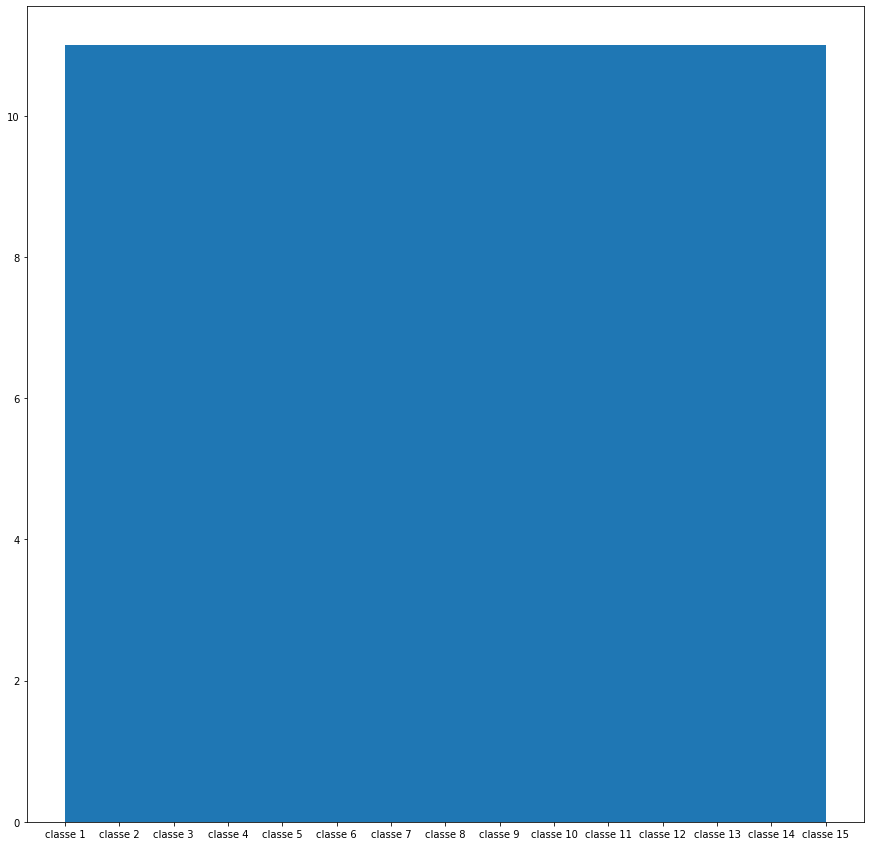

In [ ]:
plt.figure(figsize=(15,15))
plt.hist(dataset['classes'],bins=15)

In [ ]:
dataset['classes']=='classe 1'

0       True
1       True
2       True
3       True
4       True
       ...  
160    False
161    False
162    False
163    False
164    False
Name: classes, Length: 165, dtype: bool

In [ ]:
i=0
X_train=pd.DataFrame()
Y_train=pd.DataFrame()
X_test=pd.DataFrame()
Y_test=pd.DataFrame()
for classe1 in vect_classes:
  datafram=pd.DataFrame()
  for classes in dataset['classes']:
    if classe1==classes:
      datafram=datafram.append(dataset.iloc[[i]])
      i=i+1
  x=datafram.drop(['classes'],axis=1)
  y=datafram['classes']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5, random_state=42)
  
  X_train=pd.concat([X_train,x_train])
  Y_train=pd.concat([Y_train,y_train])
  X_test= pd.concat([X_test,x_test])
  Y_test= pd.concat([Y_test,y_test])


   
 
print(Y_train) 
  
  



             0
1     classe 1
8     classe 1
4     classe 1
7     classe 1
3     classe 1
..         ...
162  classe 15
158  classe 15
161  classe 15
157  classe 15
160  classe 15

[90 rows x 1 columns]


         0         1         2         3         4         5         6     \
40   0.407418  0.389051  0.001481  0.080725  0.407418  0.000000  0.064574   
114  0.490725  0.030438  0.138250  0.000360  0.490725  0.000491  0.000000   
25   0.424098  0.000639  0.116385  0.001354  0.424098  0.002795  0.003894   
23   0.430144  0.167379  0.027300  0.111151  0.430144  0.002615  0.011062   
119  0.490286  0.112625  0.000000  0.088980  0.490286  0.062655  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
71   0.464611  0.007440  0.137030  0.000000  0.464611  0.001149  0.005720   
106  0.486413  0.003262  0.141655  0.127625  0.486413  0.000838  0.000000   
14   0.392351  0.097608  0.000000  0.077380  0.392351  0.000000  0.062280   
92   0.392185  0.263529  0.000000  0.070384  0.392185  0.048907  0.000000   
102  0.481399  0.152160  0.007828  0.144571  0.481399  0.007324  0.000000   

         7         8         9     ...      3770      3771      3772  \
40 

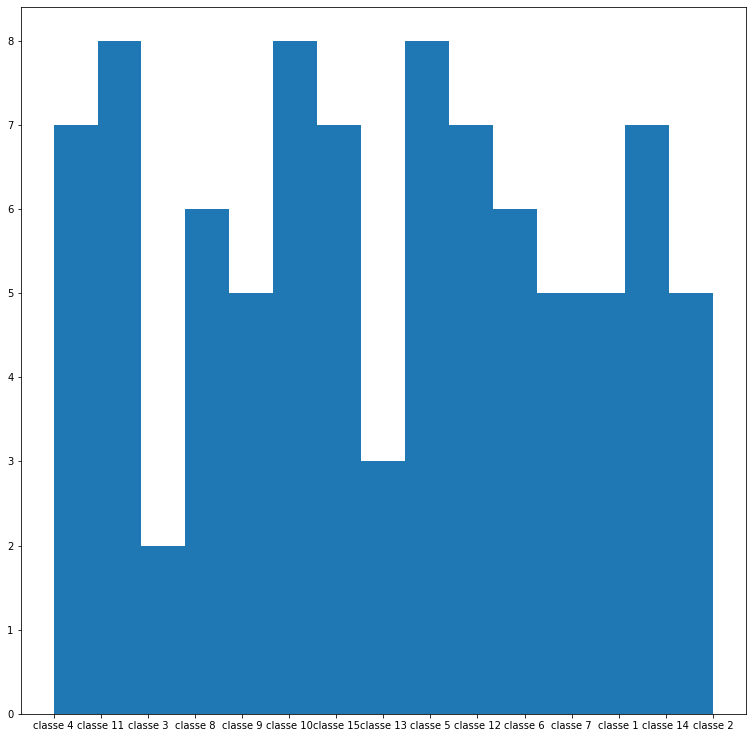

In [ ]:

X=dataset.drop(['classes'], axis=1)
y=dataset['classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.46, random_state=42)
plt.figure(figsize=(13,13))
plt.hist(y_train,bins=15)
print(X_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Commentaire:
On sépare notre dataset en données d'apprentissage et données de test.

# 3. Classification:

# **KNN**

## 1.Apprentissage et prediction

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

[0.9733333333333334, 0.9466666666666667, 0.9733333333333334, 0.9466666666666667, 0.92, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9333333333333333, 0.9066666666666666, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9333333333333333, 0.9066666666666666]


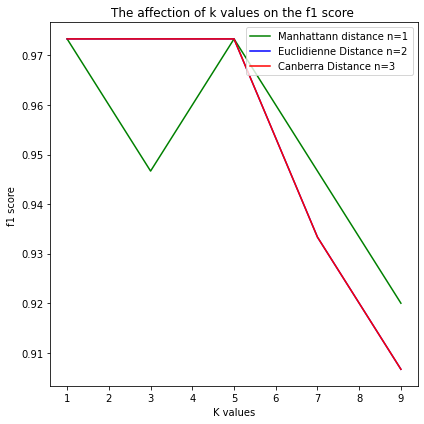

In [ ]:
n=1
k=1
train_test = []

while n<4  :
    k=1
    while j <10:
        #Apprentissage
        knn_clf = KNeighborsClassifier(n_neighbors = k, p = n)
        knn_clf.fit(X_train,Y_train)
        #peredictions
        y_predict = knn_clf.predict(X_test)
        train_test.append(accuracy_score(Y_test, y_predict))
        k=k+2
    n=n+1
print('\n accuracy_score : ' )
print(train_test)

#plot accuracy_score par rapport a la valeur de k
plt.figure(figsize=(6,6))
plt.plot([1,3,5,7,9],[train_test[0],train_test[1],train_test[2],train_test[3],train_test[4]],'g', label='Manhattann distance n=1')
plt.plot([1,3,5,7,9],[train_test[5],train_test[6],train_test[7],train_test[8],train_test[9]],'b', label='Euclidienne Distance n=2')
plt.plot([1,3,5,7,9],[train_test[10],train_test[11] ,train_test[12],train_test[13],train_test[14]],'r', label='Canberra Distance n=3')
plt.title("The affection of k values on the accuracy_score ")
plt.legend(loc="upper right")
plt.ylabel("accuracy_score ")
plt.xlabel("K values")
plt.tight_layout()
plt.show()







> ### Commentaires:

aprés avoir etudier les score du models par rapport au valeur de k pour chaqu'une des 3 distances on remarque  :
- les courbes des distances Euclidienne et
Canberra sont supperposées car leurs valeur sont identique 
- on remarque que la valeur maximal est atteint quand k=1 et elle reste stable jusqu'a la valeur k=5 pour les distance Euclidienne et Canberra alors que pour la distance Manhattan elle descend en pic a la valeur k=3 puis elle remonte à k=5 (un minimat local)
- apres la valeur k=5 les accurency diminue grandement pour les 3 distance ce qui est provoquer par un overfitting 

ainsi le meilleur résultat obtenu est atteint lorsque k=[1,5] pour les distances Euclidienne et
Canberr




## 2.Matrice de confission

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Confusion Matrix for this Dataset')

<Figure size 1224x1224 with 0 Axes>

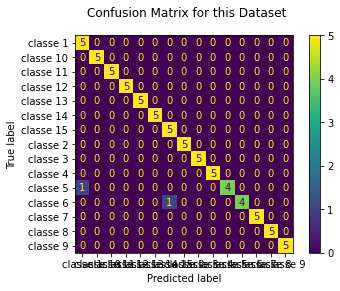

In [ ]:
knn_clf = KNeighborsknn_clf(n_neighbors = 5, p = 2)
knn_clf.fit(X_train,Y_train)

y_predict = knn_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_predict)))

plt.figure(figsize=(17,17))
fig = plot_confusion_matrix(knn_clf, X_test, Y_test, display_labels=knn_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for this Dataset")



> ### **Analyse:**


On analysant la matrice de confusion, on remarque que la majorité des résultats prédis coinsident avec les y observés, ce qui veut dire que la majorité des résulats ont été correctement prédis, a part 2 valeur : 

-pour une entrée la sortie devrait etre classée 5 alors que le modèle lui a attribué la classe 1.

-pour une entrée la sortie devrait etre classée 6 alors que le modèle lui a attribué la classe 15.

# **MLP**

## 1.Apprentissage:

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

## 2.Predictions :

In [ ]:
y_pred = mlp_clf.predict(X_test)
print(y_pred)

print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

['classe 1' 'classe 1' 'classe 1' 'classe 1' 'classe 1' 'classe 2'
 'classe 2' 'classe 2' 'classe 2' 'classe 2' 'classe 3' 'classe 3'
 'classe 3' 'classe 3' 'classe 3' 'classe 4' 'classe 4' 'classe 4'
 'classe 4' 'classe 4' 'classe 5' 'classe 5' 'classe 5' 'classe 5'
 'classe 5' 'classe 6' 'classe 6' 'classe 6' 'classe 6' 'classe 9'
 'classe 7' 'classe 7' 'classe 7' 'classe 7' 'classe 7' 'classe 8'
 'classe 8' 'classe 8' 'classe 8' 'classe 8' 'classe 9' 'classe 9'
 'classe 9' 'classe 9' 'classe 9' 'classe 10' 'classe 10' 'classe 10'
 'classe 10' 'classe 10' 'classe 11' 'classe 11' 'classe 11' 'classe 11'
 'classe 11' 'classe 12' 'classe 12' 'classe 12' 'classe 12' 'classe 12'
 'classe 13' 'classe 13' 'classe 13' 'classe 13' 'classe 13' 'classe 14'
 'classe 14' 'classe 14' 'classe 14' 'classe 14' 'classe 15' 'classe 15'
 'classe 15' 'classe 15' 'classe 15']
Accuracy: 0.99



> ### Commentaires:
On a obtenue une présision de 99% sur les données de test ce qui est juger trés bon.

## 3.Matrice de confusion :

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0.98, 'Confusion Matrix for this Dataset')

<Figure size 1224x1224 with 0 Axes>

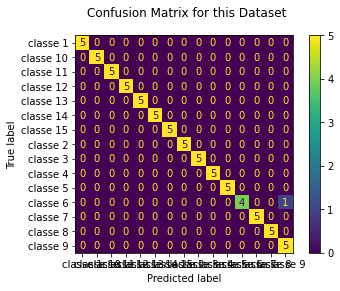

In [ ]:
plt.figure(figsize=(17,17))
fig = plot_confusion_matrix(mlp_clf, X_test, Y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for this Dataset")




> ### **Analyse:**


On analysant la matrice de confusion, on remarque que la majorité des résultats prédis coinsident avec les y observés, ce qui veut dire que la majorité des résulats ont été correctement prédis, a part  une seule valeur pour une entrée la sortie devrait etre classée 6 alors que le modèle lui a attribué à la classe 9.


## 4.Loss curve:

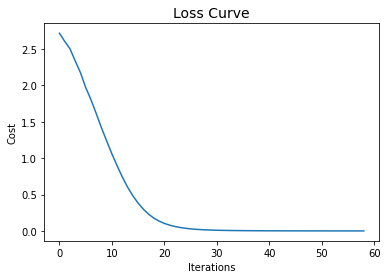

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()



> ### Commentaires:


Cette coube du loss fonction  nous montre que cette fonction déminue et elle stabilise (atteint son minimum) au 30 iterations, donc on peut se limiter a 30 iterations et c'est suffisant pour converger nos paramètres.

# 8.Comparaison des deux méthodes de classification:

KNN et MLP donnent des performances presque similaires, sauf que MLP fonctionne légèrement mieux sur nos données de training et donne un taux d'erreur légèrement inférieur sur les données de test ( une seule valeur fause pour MLP et 2 valeur fausse pour KNN) .

les performances du modele MLP sont plus améliorées avec un score de **0,98** en comparaison avec celles du classifieur KNN qui a donner un score de **0,97** utilisé pour la reconaissance faciale   


Les performances du classificateur k-NN utilisé ici dépendent sur la distance et la valeur de k choisie pour le travail alors que les performances du model MLP dépendent sur le choix du nombre des noeud pour la couche cacher 



# 9.Quelles sont les images qui ont été mal classées ? Justifier

on remarque que dans les 2 matrice de confusion il y a une valeur de la classe 6 qui est mal representer dans les deux méthodes de classification, donc les images de la classe 6 sont mal classées 

# 10.Propositions pour améliorer les les performances atteintes:
On peut ameliorer les performences de ces modeles, a travers:
*   Bien choisir les parametres (le nombre de couches cachees pour le MLP et le K pour le KNN )
*   Fournir davantage d’échantillons de données: plus notre echantillon de depart sera grand plus on aura de pressision sur les donnees predites.
*  Centrer et reduire nos donnees pour les mettre sur le meme echelle.
* Examiner la courbe d’apprentissage pour voir si l’algorithme utilisé sur-apprend (overfitting) ou sous-apprend (underfitting) le problème étudié.

